In [1]:
!cp /content/drive/MyDrive/ERA/S8/utils.py /content
!cp /content/drive/MyDrive/ERA/S8/model.py /content

In [2]:
import torch
import torch.optim as optim
from torchvision import datasets, transforms
import torch.nn as nn
import model
import utils

In [3]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if cuda else "cpu")

CUDA Available? True


In [4]:
train_transforms = transforms.Compose([

      transforms.RandomHorizontalFlip(),
      # transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
      transforms.ToTensor(),
      transforms.Normalize((0.49, 0.48, 0.44), (0.24, 0.24, 0.26))
      ])
 # Test data transformations
test_transforms = transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize((0.49, 0.48, 0.44), (0.24, 0.24, 0.26))
      ])

train_data = datasets.CIFAR10('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.CIFAR10('../data', train=False, download=True, transform=test_transforms)

100%|██████████| 170498071/170498071 [00:02<00:00, 84507213.06it/s]


Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified


In [5]:
batch_size = 64

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)


Sample Data

car   truck plane deer  ship  deer  deer  horse truck car   car   ship  deer  horse plane truck frog  car   plane car   deer  dog   plane deer  bird  truck dog   dog   car   frog  bird  car   bird  dog   plane ship  ship  dog   plane frog  car   truck frog  truck deer  bird  cat   deer  deer  car   car   bird  ship  horse dog   frog  ship  dog   dog   dog   truck frog  deer  deer 


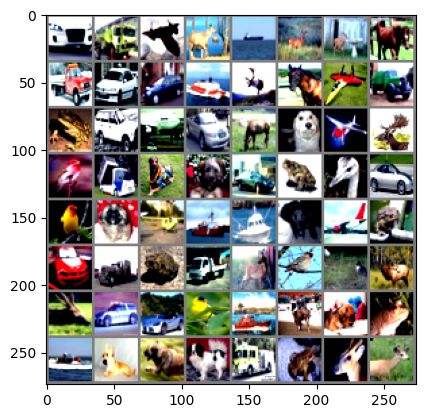

In [6]:
utils.plot_data(data_loader=train_loader,batch=batch_size)

Modelling

In [7]:
nn_model = model.Net_Group()
model.model_summary(nn_model, device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 20, 32, 32]             540
         GroupNorm-2           [-1, 20, 32, 32]              40
              ReLU-3           [-1, 20, 32, 32]               0
         Dropout2d-4           [-1, 20, 32, 32]               0
            Conv2d-5           [-1, 20, 32, 32]           3,600
         GroupNorm-6           [-1, 20, 32, 32]              40
              ReLU-7           [-1, 20, 32, 32]               0
         Dropout2d-8           [-1, 20, 32, 32]               0
            Conv2d-9           [-1, 16, 32, 32]             320
        MaxPool2d-10           [-1, 16, 16, 16]               0
           Conv2d-11           [-1, 16, 16, 16]           2,304
        GroupNorm-12           [-1, 16, 16, 16]              32
             ReLU-13           [-1, 16, 16, 16]               0
        Dropout2d-14           [-1, 16,

In [8]:
optimizer = optim.SGD(nn_model.parameters(), lr=0.01, momentum=0.9)
# scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.02, epochs=10, steps_per_epoch=len(train_loader))
criterion = nn.CrossEntropyLoss()
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  utils.train(nn_model, device, train_loader, optimizer, criterion)
  utils.test(nn_model, device, test_loader, criterion,torch)
  # scheduler.step()


Epoch 1


Train: Loss=1.3743 Batch_id=781 Accuracy=35.08: 100%|██████████| 782/782 [00:22<00:00, 34.23it/s]


Test set: Average loss: 0.0241, Accuracy: 4313/10000 (43.13%)

Epoch 2


Train: Loss=0.8871 Batch_id=781 Accuracy=48.96: 100%|██████████| 782/782 [00:24<00:00, 32.20it/s]


Test set: Average loss: 0.0204, Accuracy: 5293/10000 (52.93%)

Epoch 3


Train: Loss=1.2786 Batch_id=781 Accuracy=54.84: 100%|██████████| 782/782 [00:24<00:00, 32.30it/s]


Test set: Average loss: 0.0177, Accuracy: 5979/10000 (59.79%)

Epoch 4


Train: Loss=0.5337 Batch_id=781 Accuracy=58.51: 100%|██████████| 782/782 [00:24<00:00, 32.05it/s]


Test set: Average loss: 0.0177, Accuracy: 6021/10000 (60.21%)

Epoch 5


Train: Loss=1.5199 Batch_id=781 Accuracy=61.05: 100%|██████████| 782/782 [00:23<00:00, 32.92it/s]


Test set: Average loss: 0.0159, Accuracy: 6469/10000 (64.69%)

Epoch 6


Train: Loss=1.0220 Batch_id=781 Accuracy=63.05: 100%|██████████| 782/782 [00:22<00:00, 34.61it/s]


Test set: Average loss: 0.0154, Accuracy: 6461/10000 (64.61%)

Epoch 7


Train: Loss=0.7104 Batch_id=781 Accuracy=64.33: 100%|██████████| 782/782 [00:22<00:00, 34.51it/s]


Test set: Average loss: 0.0146, Accuracy: 6726/10000 (67.26%)

Epoch 8


Train: Loss=1.4186 Batch_id=781 Accuracy=65.50: 100%|██████████| 782/782 [00:23<00:00, 33.70it/s]


Test set: Average loss: 0.0143, Accuracy: 6750/10000 (67.50%)

Epoch 9


Train: Loss=1.1727 Batch_id=781 Accuracy=66.70: 100%|██████████| 782/782 [00:23<00:00, 32.96it/s]


Test set: Average loss: 0.0156, Accuracy: 6539/10000 (65.39%)

Epoch 10


Train: Loss=1.2143 Batch_id=781 Accuracy=67.62: 100%|██████████| 782/782 [00:24<00:00, 31.68it/s]


Test set: Average loss: 0.0137, Accuracy: 6955/10000 (69.55%)

Epoch 11


Train: Loss=0.7045 Batch_id=781 Accuracy=68.29: 100%|██████████| 782/782 [00:24<00:00, 31.65it/s]


Test set: Average loss: 0.0136, Accuracy: 6940/10000 (69.40%)

Epoch 12


Train: Loss=0.6173 Batch_id=781 Accuracy=69.15: 100%|██████████| 782/782 [00:24<00:00, 32.24it/s]


Test set: Average loss: 0.0145, Accuracy: 6719/10000 (67.19%)

Epoch 13


Train: Loss=1.1076 Batch_id=781 Accuracy=69.49: 100%|██████████| 782/782 [00:23<00:00, 33.57it/s]


Test set: Average loss: 0.0136, Accuracy: 6988/10000 (69.88%)

Epoch 14


Train: Loss=1.5732 Batch_id=781 Accuracy=69.77: 100%|██████████| 782/782 [00:22<00:00, 34.21it/s]


Test set: Average loss: 0.0136, Accuracy: 6934/10000 (69.34%)

Epoch 15


Train: Loss=0.8915 Batch_id=781 Accuracy=70.60: 100%|██████████| 782/782 [00:22<00:00, 34.08it/s]


Test set: Average loss: 0.0130, Accuracy: 7115/10000 (71.15%)

Epoch 16


Train: Loss=0.9246 Batch_id=781 Accuracy=70.70: 100%|██████████| 782/782 [00:24<00:00, 32.18it/s]


Test set: Average loss: 0.0130, Accuracy: 7142/10000 (71.42%)

Epoch 17


Train: Loss=0.5717 Batch_id=781 Accuracy=71.40: 100%|██████████| 782/782 [00:24<00:00, 32.13it/s]


Test set: Average loss: 0.0127, Accuracy: 7188/10000 (71.88%)

Epoch 18


Train: Loss=0.6086 Batch_id=781 Accuracy=71.56: 100%|██████████| 782/782 [00:24<00:00, 31.97it/s]


Test set: Average loss: 0.0129, Accuracy: 7158/10000 (71.58%)

Epoch 19


Train: Loss=1.0347 Batch_id=781 Accuracy=72.18: 100%|██████████| 782/782 [00:24<00:00, 31.88it/s]


Test set: Average loss: 0.0127, Accuracy: 7116/10000 (71.16%)

Epoch 20


Train: Loss=1.3929 Batch_id=781 Accuracy=71.98: 100%|██████████| 782/782 [00:23<00:00, 33.21it/s]


Test set: Average loss: 0.0125, Accuracy: 7252/10000 (72.52%)



Model Plots

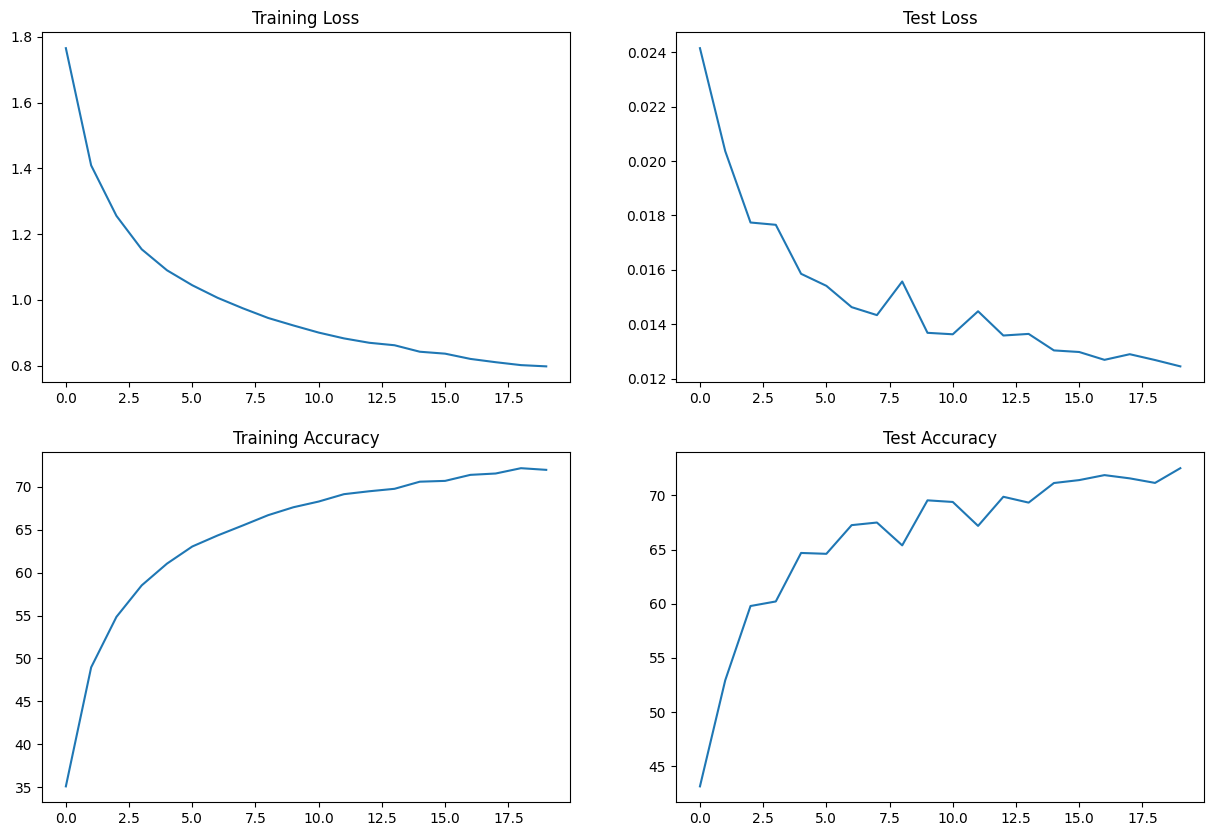

In [9]:
utils.plot_loss_accuracy()

Evaluation

Ground truth:

  frog    dog   deer    cat    car
Predicted:

  frog    dog   deer    cat    car


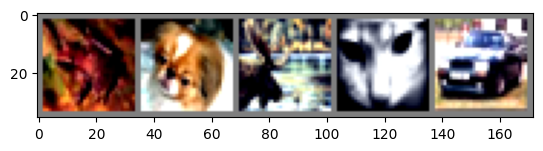

In [10]:
utils.model_evaluation(model=nn_model,device=device,test_loader=test_loader,test_batch_size=5)